In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv("../Data/cleanedSample.csv",low_memory=False)

In [3]:
numerical_data = df[['Longitude', 'Latitude']]
categorical_data = df[['Day', 'Violation Code', 'Street']]

In [4]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

In [5]:
data_scaled = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), categorical_data], axis=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 446328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 446328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 446328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 446328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 446328.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3452, cost: 426965.0
Run 1, iteration: 2/100, moves: 793, cost: 426965.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1260, cost: 427872.0
Init: init

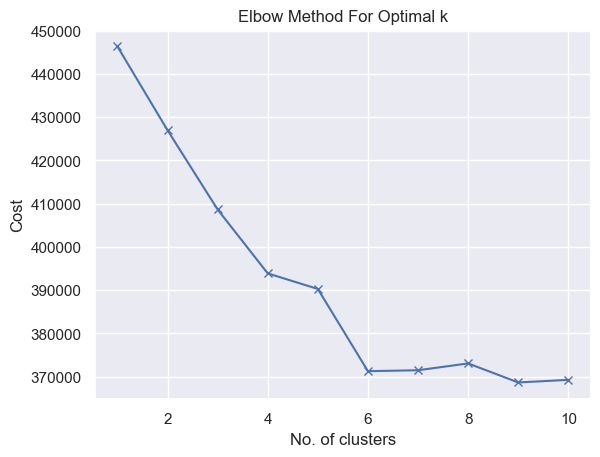

In [6]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_scaled)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
kmodes = KModes(n_clusters = 9, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(data_scaled)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6898, cost: 394678.0
Run 1, iteration: 2/100, moves: 74, cost: 394678.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 32770, cost: 376951.0
Run 2, iteration: 2/100, moves: 631, cost: 376926.0
Run 2, iteration: 3/100, moves: 30, cost: 376926.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 29089, cost: 365200.0
Run 3, iteration: 2/100, moves: 5474, cost: 365200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28498, cost: 372518.0
Run 4, iteration: 2/100, moves: 1924, cost: 372449.0
Run 4, iteration: 3/100, moves: 20, cost: 372449.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20943, cost: 365203.0
Run 5, iteration: 2/

array([5, 4, 5, ..., 0, 3, 2], dtype=uint16)

In [8]:
labels = kmodes.labels_
data_scaled['Cluster'] = labels
data_scaled = data_scaled.astype({"Violation Code":"int","Cluster":"int"})

<Axes: xlabel='Longitude', ylabel='Latitude'>

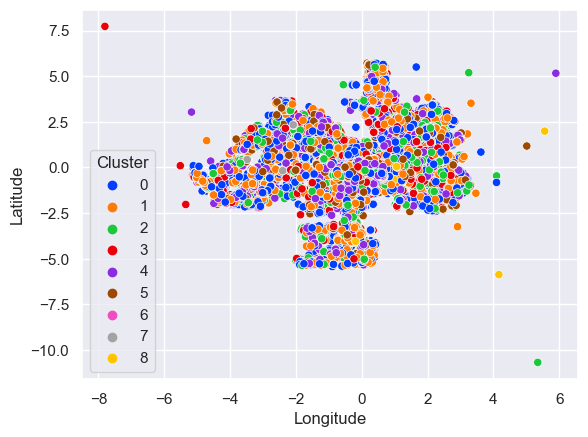

In [9]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data_scaled, palette=palette)

In [10]:
Q1 = data_scaled[['Longitude', 'Latitude']].quantile(0.25)
Q3 = data_scaled[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where either column is outside of the IQR range
df_filtered = data_scaled[~((data_scaled[['Longitude', 'Latitude']] < (Q1 - 1.5 * IQR)) | (data_scaled[['Longitude', 'Latitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='Longitude', ylabel='Latitude'>

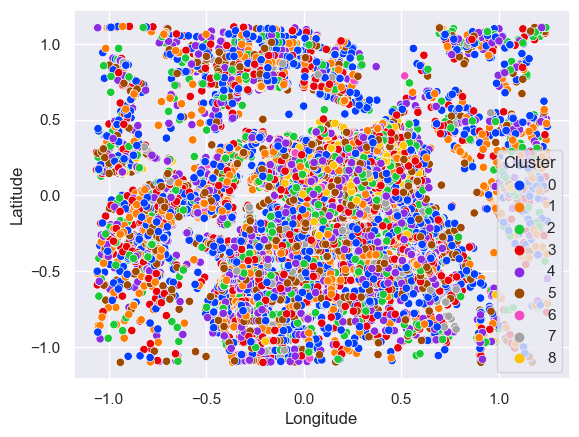

In [11]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered, palette=palette)

In [33]:
cluster_modes = data_scaled.groupby('Cluster').apply(lambda x: x.mode().iloc[0])
col = data_scaled.groupby('Cluster').agg(pd.Series.count)
cluster_modes["Count"] = col["Day"]
print(cluster_modes)

0        Longitude  Latitude        Day  Violation Code         Street  \
Cluster                                                                  
0        -0.103093  0.165705   Thursday              13    William AVE   
1         0.136596 -0.308310   Saturday              39     Ellice AVE   
2        -0.005592 -0.132862  Wednesday               1      Colony ST   
3        -0.103093  0.359621    Tuesday               1    William AVE   
4         0.282847  0.162627     Friday               1  Bannatyne AVE   
5         0.319410  0.190330     Monday               1  Bannatyne AVE   
6         0.258472  0.279592   Thursday               7    Lombard AVE   
7        -0.107156 -0.135940  Wednesday               5   McDermot AVE   
8        -0.180281  0.199564   Thursday               1    Hargrave ST   

0        Cluster  Count  
Cluster                  
0              0  20179  
1              1  10768  
2              2  15308  
3              3  16735  
4              4  15713  
5  

In [13]:
cluster_modes.to_csv("../Results/K-Modes_Cluster_Info_midnight.csv",index=False)

In [14]:
data_scaled

,Longitude,Latitude,Day,Violation Code,Street,Cluster
0,-0.024146,-2.033171,Monday,37,Marjorie ST,5
1,0.006595,0.036429,Friday,1,Edmonton ST,4
2,0.250347,0.021039,Monday,2,Hargrave ST,5
3,0.009979,-0.000754,Thursday,1,St Mary AVE,8
4,0.008354,0.309264,Wednesday,1,Fort ST,2
...,...,...,...,...,...,...
99995,0.097596,0.226958,Friday,1,Garry ST,4
99996,0.396326,0.210922,Friday,1,King ST,4
99997,0.607850,-0.323700,Friday,3,William AVE,0
99998,-0.115281,0.036429,Tuesday,1,Kennedy ST,3


In [16]:
noLocdf = df[['Day', 'Violation Code', 'Street']]
noLocdf

,Day,Violation Code,Street
0,Monday,37,Marjorie ST
1,Friday,1,Edmonton ST
2,Monday,2,Hargrave ST
3,Thursday,1,St Mary AVE
4,Wednesday,1,Fort ST
...,...,...,...
99995,Friday,1,Garry ST
99996,Friday,1,King ST
99997,Friday,3,William AVE
99998,Tuesday,1,Kennedy ST


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 246754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 246754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 246754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 246754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 246754.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8873, cost: 227774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3203, cost: 228181.0
Init: initializing centroids
Init: initializing clusters
Start

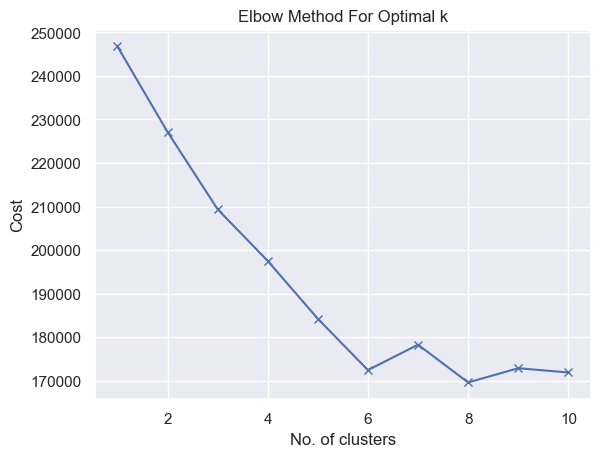

In [17]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(noLocdf)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
kmodes = KModes(n_clusters = 8, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(noLocdf)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6146, cost: 221323.0
Run 1, iteration: 2/100, moves: 921, cost: 221323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 31216, cost: 192579.0
Run 2, iteration: 2/100, moves: 5952, cost: 192579.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 33147, cost: 183165.0
Run 3, iteration: 2/100, moves: 4154, cost: 182582.0
Run 3, iteration: 3/100, moves: 208, cost: 182582.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4919, cost: 179134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4425, cost: 195806.0
Run 5, iteration: 2/100, moves: 6265, cost: 187638.0
Run 5, iteration: 3/100, moves: 976, cost: 187638.0
Best run was numbe

array([6, 2, 2, ..., 0, 0, 5], dtype=uint16)

In [32]:
labels2 = kmodes.labels_
noLocdf['Cluster'] = labels2
noLocdf = noLocdf.astype({"Violation Code":"int","Cluster":"int"})
cluster_modes2 = noLocdf.groupby('Cluster').agg(pd.Series.mode)
col = noLocdf.groupby('Cluster').agg(pd.Series.count)
cluster_modes2["Count"] = col["Day"]
cluster_modes2.to_csv("../Results/K-Modes_Cluster_Info_midnight_2.csv",index=False)
print(cluster_modes2)

               Day  Violation Code         Street  Count
Cluster                                                 
0          Tuesday               1    William AVE  27167
1         Thursday              39    William AVE   6677
2           Friday               1    Hargrave ST  14022
3          Tuesday              30      Spence ST   1100
4         Thursday               1  Bannatyne AVE  17458
5        Wednesday               1   McDermot AVE  15820
6           Monday               1    William AVE  11332
7         Thursday               5      Spence ST   6424


C:\Users\User\AppData\Local\Temp\ipykernel_23708\1372836273.py:3: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=graphData, palette=palette)


<Axes: xlabel='Longitude', ylabel='Latitude'>

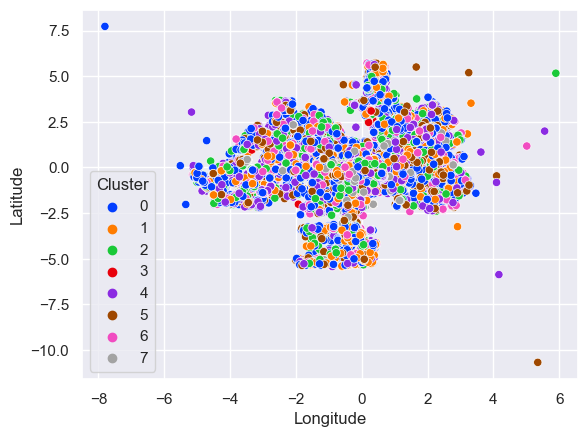

In [25]:
graphData = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), noLocdf], axis=1)
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=graphData, palette=palette)

In [26]:
Q1 = graphData[['Longitude', 'Latitude']].quantile(0.25)
Q3 = graphData[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where either column is outside of the IQR range
df_filtered2 = graphData[~((graphData[['Longitude', 'Latitude']] < (Q1 - 1.5 * IQR)) | (graphData[['Longitude', 'Latitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\User\AppData\Local\Temp\ipykernel_23708\898459221.py:2: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered2, palette=palette)


<Axes: xlabel='Longitude', ylabel='Latitude'>

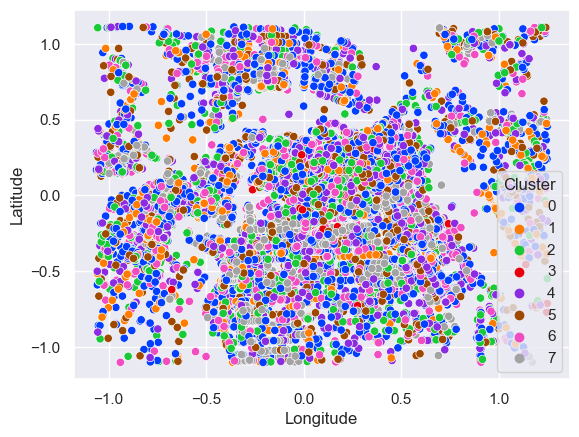

In [27]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered2, palette=palette)